* Metodo de clasificación.
* Para variables categóricas.
* Se evalua con matriz de confusión.
<br />
<img src='confusion.png' style='width: 70%'/>
<br />

* Probabilidad de acierto, precisión = (pc + nc) / total
* Probabilida de error, tasa de error = (fp + fn) / total

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Sobrevivientes por clase

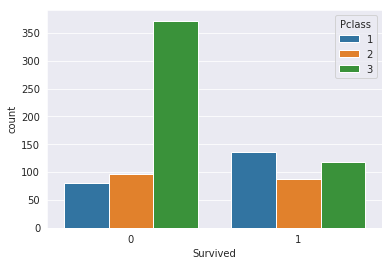

In [4]:
sns.countplot(x='Survived', data=data, hue='Pclass');

### Sobrevivientes por sexo

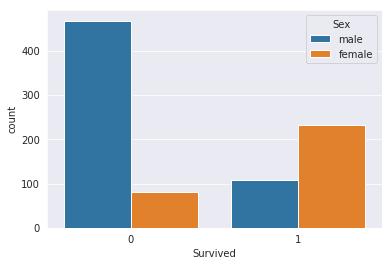

In [5]:
sns.countplot(x='Survived', data=data, hue='Sex')

### Distribución de edades

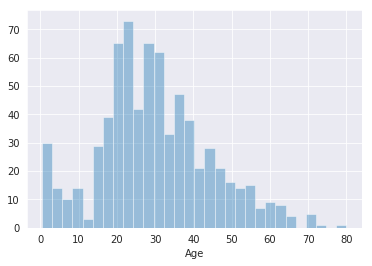

In [6]:
sns.distplot(data['Age'].dropna(), kde=False, bins=30);

In [7]:
import cufflinks as cf
cf.go_offline()

In [1]:
data['Age'].iplot(kind='hist', bins=40);

NameError: name 'data' is not defined

### Llenamos datos nulos en edad con la edad media para su clase correspondiente

In [9]:
ageMean_firstClass = data[data['Pclass'] == 1]['Age'].mean()
ageMean_secondClass = data[data['Pclass'] == 2]['Age'].mean()
ageMean_thridClass = data[data['Pclass'] == 3]['Age'].mean()
def edad_media(columnas):
    edad = columnas[0]
    clase = columnas[1]
    if  pd.isnull(edad):
        if clase == 1:
            return ageMean_firstClass
        elif clase == 2:
            return ageMean_secondClass
        else:
            return ageMean_thridClass
        
    else:
        return edad

In [10]:
data['Age'] = data[['Age', 'Pclass']].apply(edad_media, axis=1)

In [11]:
# Como la mayoria de valores para "Cabin" son nulos, borramos la columna
data.drop('Cabin', axis=1, inplace=True)

In [12]:
# Limpiemos mas nuetros datos
data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Volvamos binaria la columna sex

In [13]:
# 1 si es hombre, 0 si es mujer
data['Sex'] = pd.get_dummies(data['Sex'])['male']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [14]:
puerto = []
for i in data['Embarked']:
    if i == 'S':
        puerto.append(0)
    elif i == 'C':
        puerto.append(1)
    else:
        puerto.append(2)

data['Embarked'] = puerto
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


### Creamos un modelo para predecir si sobrevive o no en función del resto de caracteristicas.

In [19]:
y = data['Survived']
x = data.drop('Survived', axis=1)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)
modelo = LogisticRegression(solver='liblinear')
modelo.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
predicciones = modelo.predict(x_test)

In [30]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       157
           1       0.77      0.65      0.70       111

   micro avg       0.77      0.77      0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



In [32]:
conf = confusion_matrix(y_test, predicciones)
conf

array([[135,  22],
       [ 39,  72]])

In [33]:
print('positivos correctos: ', conf[0][0])
print('falsos negativos: ', conf[0][1])
print('falsos positivos: ', conf[1][0])
print('positivos negativos', conf[1][1])

positivos correctos:  135
falsos negativos:  22
falsos positivos:  39
positivos negativos 72
